# Diabetes: EDA, hypothesis testing, predictions with Python
This project focuses on the analysis of diabetes medical data and building predictive models to predict diabetes status. It includes exploratory data analysis (EDA), hypothesis testing, observations, and the development of various models to predict the presence or absence of diabetes.

# About Dataset
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well.

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

# Importing Libraires

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# Exploratory Data Analysis

In [4]:
df.shape

(70692, 22)

In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
#Dataset have no null values and also have correct Dtype

In [8]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [9]:
#Dividing the dataset into two differnt dataset on the basis of people having diabetes and people having no diabetes'
df_yes=df[df['Diabetes_binary']==1]
df_no=df[df['Diabetes_binary']==0]

# Visualization

In [10]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [11]:
#AGE
age_yes=df_yes.groupby('Sex')['Sex'].value_counts().reset_index()
age_yes

,Sex,count
0,0.0,18411
1,1.0,16935


In [12]:
age_no=df_no.groupby('Sex')['Sex'].value_counts().reset_index()
age_no

,Sex,count
0,0.0,19975
1,1.0,15371


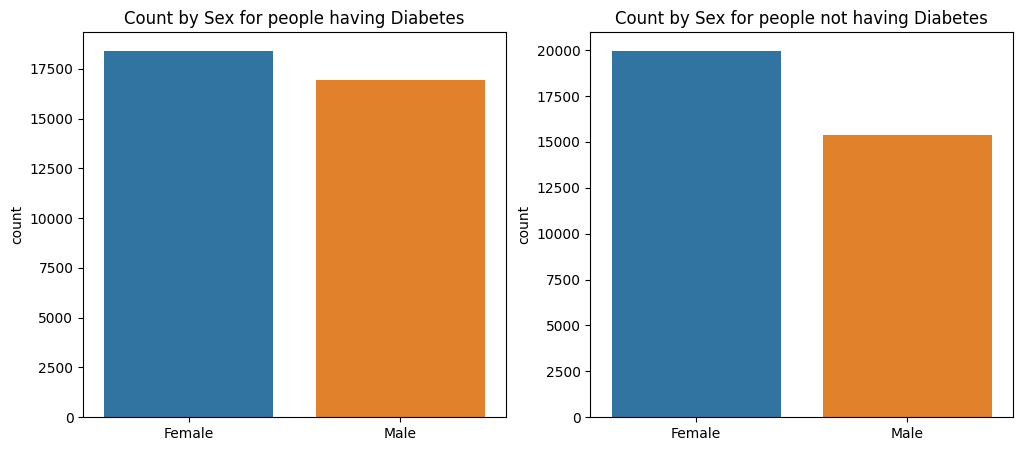

In [13]:
labels=['Female', 'Male']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=labels, y='count', data=age_yes)
plt.title('Count by Sex for people having Diabetes')
plt.subplot(1,2,2)
sns.barplot(x=labels, y='count', data=age_no)
plt.title('Count by Sex for people not having Diabetes')
plt.xticks(range(len(labels)), labels) 
plt.show()

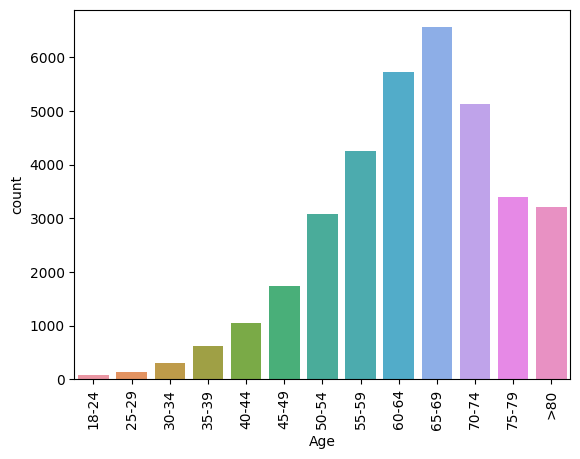

In [14]:
new_ticks=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80']
sns.countplot(data=df_yes, x='Age')
plt.xticks(ticks=range(len(new_ticks)), labels=new_ticks, rotation='vertical')
plt.show()

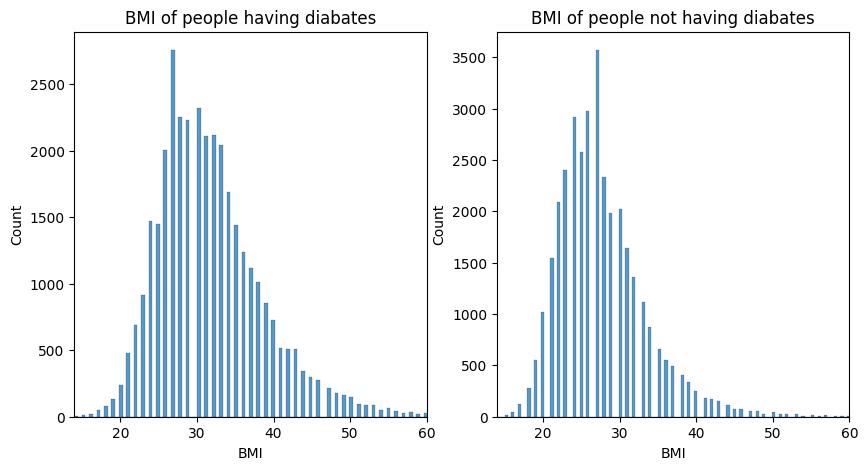

In [15]:
# Check BMI for people with diabetes and wuthout diabates. 
# We will remove outliers for better visualization, less than 15 and greater than 60.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_yes['BMI'])
plt.xlim(14,60)
plt.title('BMI of people having diabates')
plt.subplot(1,2,2)
sns.histplot(df_no['BMI'])
plt.xlim(14,60)
plt.title('BMI of people not having diabates')
plt.show()

In [16]:
#col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']



In [17]:
BP_no= df_no.groupby('HighBP')['HighBP'].value_counts().reset_index()
BP_no

,HighBP,count
0,0.0,22118
1,1.0,13228


In [18]:
BP_yes= df_yes.groupby('HighBP')['HighBP'].value_counts().reset_index()
BP_yes

,HighBP,count
0,0.0,8742
1,1.0,26604


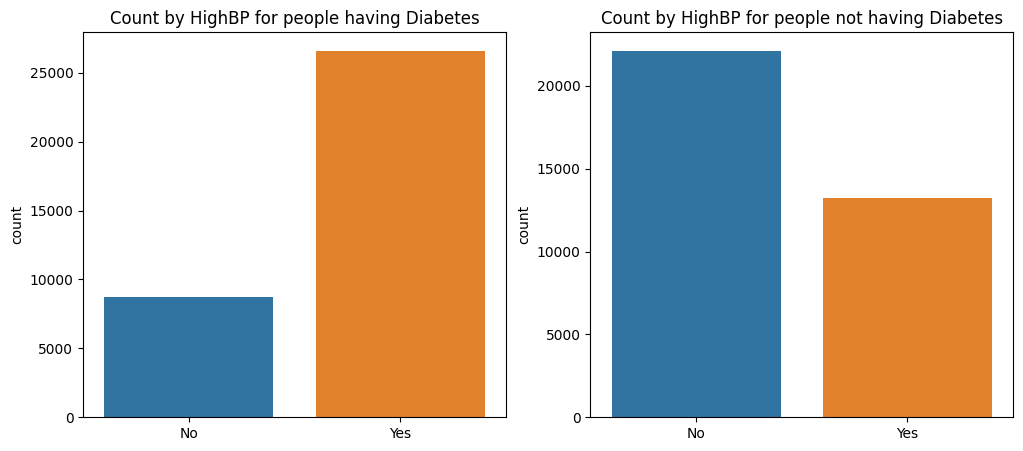

In [19]:
labels=['No', 'Yes']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=labels, y='count', data=BP_yes)
plt.title('Count by HighBP for people having Diabetes')
plt.subplot(1,2,2)
sns.barplot(x=labels, y='count', data=BP_no)
plt.title('Count by HighBP for people not having Diabetes')
plt.xticks(range(len(labels)), labels) 
plt.show()

In [20]:
chol_yes=df_yes.groupby('HighChol')['HighChol'].value_counts().reset_index()
chol_yes

,HighChol,count
0,0.0,11660
1,1.0,23686


In [21]:
chol_no=df_no.groupby('HighChol')['HighChol'].value_counts().reset_index()
chol_no

,HighChol,count
0,0.0,21869
1,1.0,13477


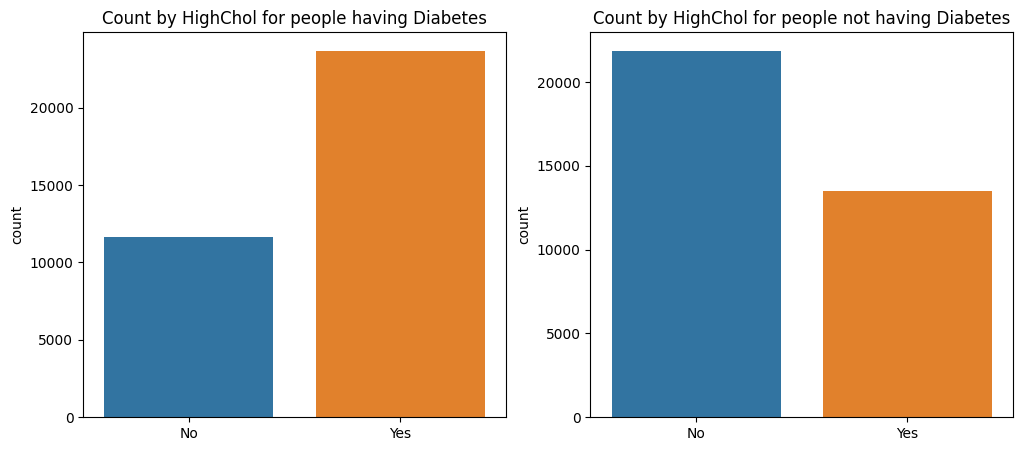

In [22]:
labels=['No', 'Yes']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=labels, y='count', data=chol_yes)
plt.title('Count by HighChol for people having Diabetes')
plt.subplot(1,2,2)
sns.barplot(x=labels, y='count', data=chol_no)
plt.title('Count by HighChol for people not having Diabetes')
plt.xticks(range(len(labels)), labels) 
plt.show()

In [23]:
Smoker_yes=df_yes.groupby('Smoker')['Smoker'].value_counts().reset_index()
Smoker_yes

,Smoker,count
0,0.0,17029
1,1.0,18317


In [24]:
Smoker_no=df_no.groupby('Smoker')['Smoker'].value_counts().reset_index()
Smoker_no

,Smoker,count
0,0.0,20065
1,1.0,15281


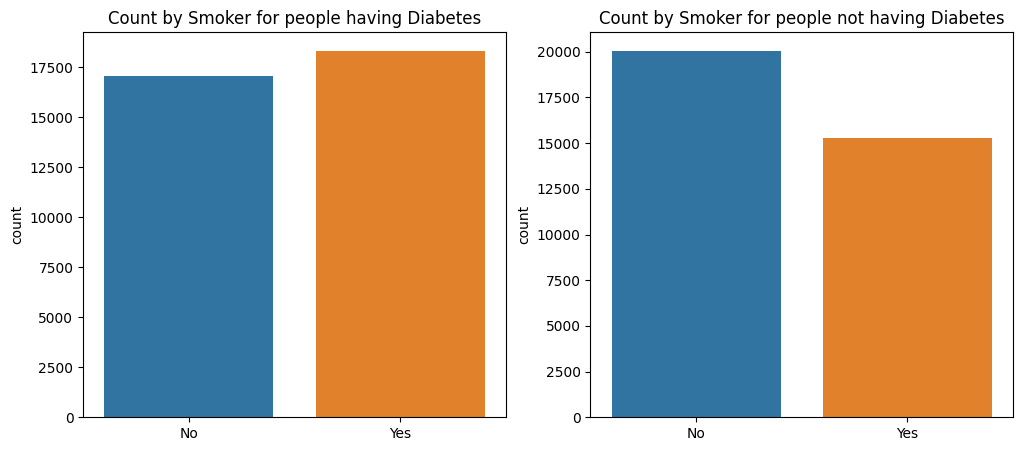

In [25]:
labels=['No', 'Yes']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=labels, y='count', data=Smoker_yes)
plt.title('Count by Smoker for people having Diabetes')
plt.subplot(1,2,2)
sns.barplot(x=labels, y='count', data=Smoker_no)
plt.title('Count by Smoker for people not having Diabetes')
plt.xticks(range(len(labels)), labels) 
plt.show()

In [26]:
Alcohol_yes=df_yes.groupby('HvyAlcoholConsump')['HvyAlcoholConsump'].value_counts().reset_index()
Alcohol_yes

,HvyAlcoholConsump,count
0,0.0,34514
1,1.0,832


In [27]:
Alcohol_no=df_no.groupby('HvyAlcoholConsump')['HvyAlcoholConsump'].value_counts().reset_index()
Alcohol_no

,HvyAlcoholConsump,count
0,0.0,33158
1,1.0,2188


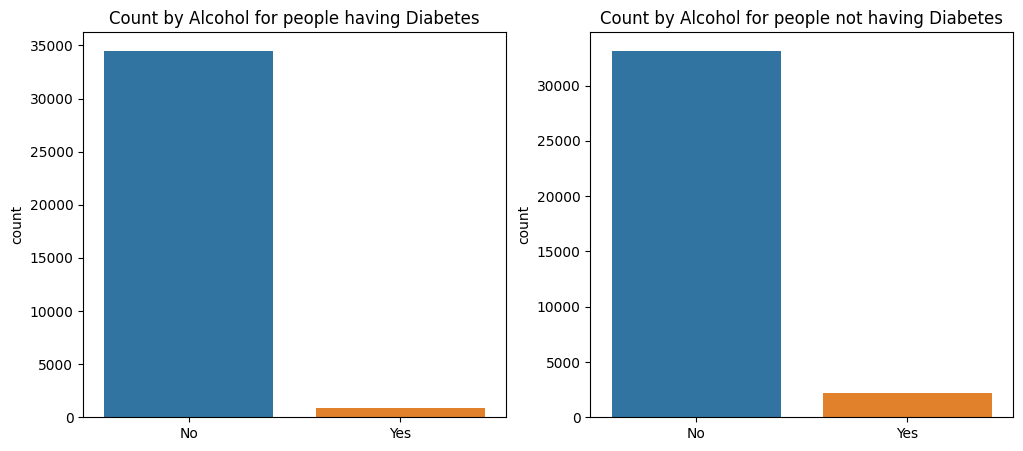

In [28]:
labels=['No', 'Yes']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=labels, y='count', data=Alcohol_yes)
plt.title('Count by Alcohol for people having Diabetes')
plt.subplot(1,2,2)
sns.barplot(x=labels, y='count', data=Alcohol_no)
plt.title('Count by Alcohol for people not having Diabetes')
plt.xticks(range(len(labels)), labels) 
plt.show()

In [29]:
physical_yes=df_yes.groupby('PhysActivity')['PhysActivity'].value_counts().reset_index()
physical_yes

,PhysActivity,count
0,0.0,13059
1,1.0,22287


In [30]:
physical_no=df_no.groupby('PhysActivity')['PhysActivity'].value_counts().reset_index()
physical_no

,PhysActivity,count
0,0.0,7934
1,1.0,27412


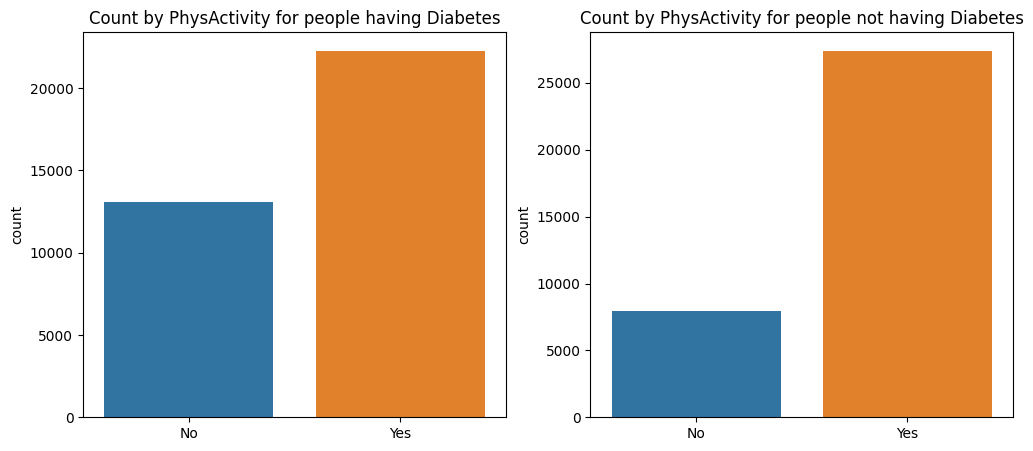

In [31]:
labels=['No', 'Yes']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=labels, y='count', data=physical_yes)
plt.title('Count by PhysActivity for people having Diabetes')
plt.subplot(1,2,2)
sns.barplot(x=labels, y='count', data=physical_no)
plt.title('Count by PhysActivity for people not having Diabetes')
plt.xticks(range(len(labels)), labels) 
plt.show()

In [32]:
DiffWalk_yes=df_yes.groupby('DiffWalk')['DiffWalk'].value_counts().reset_index()
DiffWalk_yes

,DiffWalk,count
0,0.0,22225
1,1.0,13121


In [33]:
DiffWalk_no=df_no.groupby('DiffWalk')['DiffWalk'].value_counts().reset_index()
DiffWalk_no

,DiffWalk,count
0,0.0,30601
1,1.0,4745


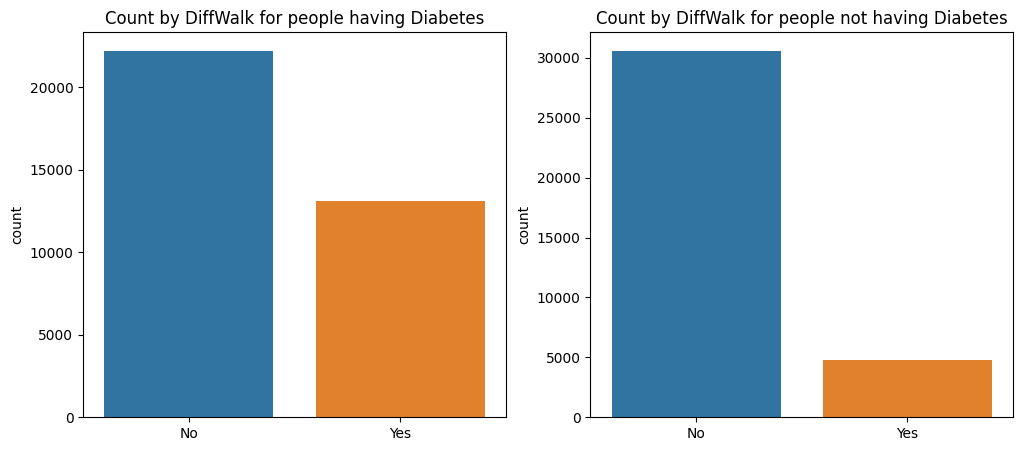

In [34]:
labels=['No', 'Yes']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=labels, y='count', data=DiffWalk_yes)
plt.title('Count by DiffWalk for people having Diabetes')
plt.subplot(1,2,2)
sns.barplot(x=labels, y='count', data=DiffWalk_no)
plt.title('Count by DiffWalk for people not having Diabetes')
plt.xticks(range(len(labels)), labels) 
plt.show()

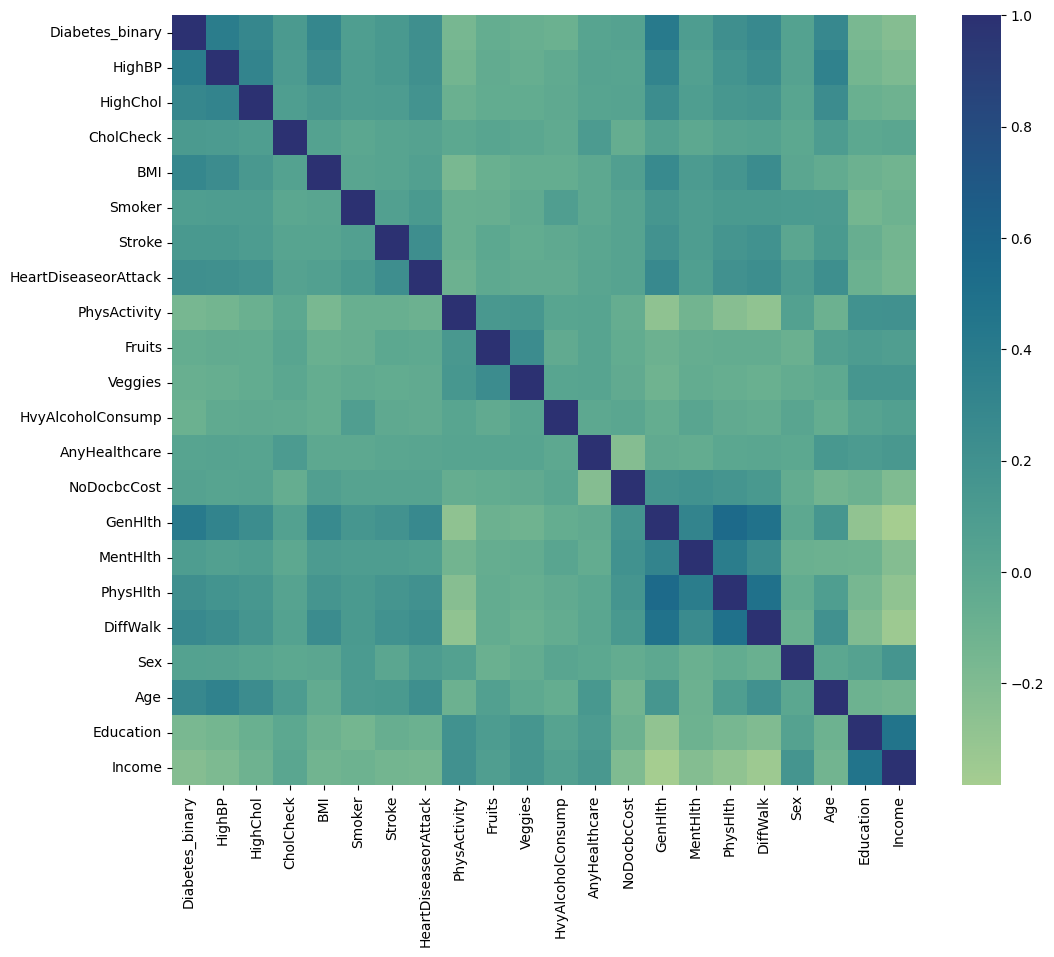

In [35]:
# Visualize relationship between all variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='crest')
plt.show()

# Observations
* Both females and males are vulnerable to diabetes.
* Age groups that are most affected by diabetes 60-64, 65-70, 70-74.
* People with diabetes have higher BMI.
* People with diabetes tend to have high cholesterol levels and high blood pressure.
* Diabetics have fewer physical activities and difficulty walking.
* Smoking and alcohol consumption doesn't affect diabetes status much.
* Variables correlated with diabetes status are general health, high blood pressure, high cholesterol, BMI, difficulties in walking, and age.

# Hypothesis testing

### 1. Do Diabetics and non Diabetics people have same BMI

* H0 - no-diabetes and diabetics have the same average BMI.
* Ha - no-diabetes and diabetics have different average BMI.

In [36]:
from scipy import stats
from scipy.stats import shapiro, levene,chi2_contingency,mannwhitneyu


In [37]:
#preparing the data for diabetics and non diabetics people

bmi_no=df_no['BMI']
bmi_yes=df_yes['BMI']

# Normality assumption

* H0 = The assumption of normal distribution is provided
* H1 = The assumption of normal distribution is not provided

In [38]:
test_stats_shapiro, p_value_shapiro= shapiro(bmi_no)
print('p_value:', p_value_shapiro)
print('test_stats:', test_stats_shapiro)

p_value: 0.0
test_stats: 0.8686134219169617


In [39]:
test_stats_shapiro1, p_value_shapiro1= shapiro(bmi_yes)
print('p_value:', p_value_shapiro1)
print('test_stats:', test_stats_shapiro1)

p_value: 0.0
test_stats: 0.9147081971168518


In [40]:
# p_value<0.05 so the data is non parametric

# variance Homogenity
* H0 = Variance are Homogenious
* H1 = Vaiance are non homogenious

In [41]:
statistic, p_value_levene = levene(bmi_no, bmi_yes)
print('p_value:', p_value_levene)

p_value: 5.502591863661869e-194


In [42]:
# p_value is >0.05 so the variance are homogenious

In [43]:
print('Average BMI for non Diabetics:', bmi_no.mean())
print('Average BMI for Diabetics:',bmi_yes.mean())

Average BMI for non Diabetics: 27.769959825722854
Average BMI for Diabetics: 31.94401063769592


In [44]:
# we are taking 1 numeric and 1 categorical data also data is non parmetric so we are using two_sample_t-test

ttest_bmi,p_value_bmi  = stats.ttest_ind(bmi_yes, bmi_no)
print('p_value:', p_value_bmi)  

p_value: 0.0


#### p_value<0.05 we reject null hypothesis that no-diabetes and diabetics have the same average BMI.

### 2. Do no-diabetes and diabetics have the same number of poor physical health days per month?
* H0 - No-diabetes and diabetics have the same average number of poor physical health days per month.
* Ha - No-diabetes and diabetics have the different average number of poor physical health days per month

In [45]:
phy_yes=df_yes['PhysHlth']
phy_no=df_no['PhysHlth']

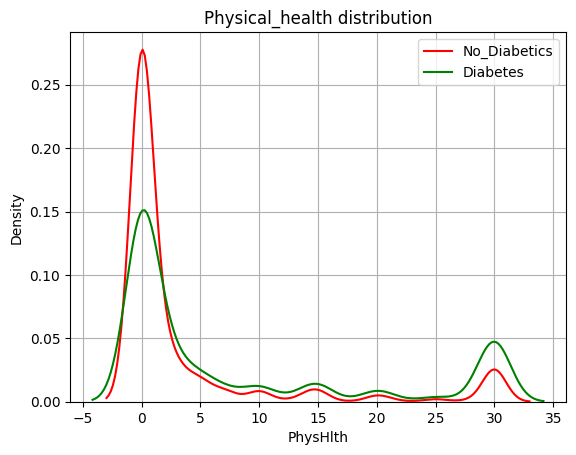

In [46]:
sns.kdeplot(phy_no,color='red')
sns.kdeplot(phy_yes,color='green')
plt.grid()
plt.title('Physical_health distribution')
plt.legend(['No_Diabetics', 'Diabetes'])
plt.show()

In [47]:
# with the help of distplot we can assume that the data is non_parametic so we can use  mannwhitneyu test

In [48]:
print('Average Physical health for non Diabetics:', phy_no.mean())
print('Average Physical health for Diabetics:',phy_yes.mean())

Average Physical health for non Diabetics: 3.666355457477508
Average Physical health for Diabetics: 7.954478583149437


In [49]:
# we are taking 1 numeric and 1 categorical data also data is non parmetric so we are using two_sample_t-test

ttest_phy,p_value_phy  = stats.ttest_ind(phy_yes, phy_no)
print('p_value:', p_value_phy)  

p_value: 0.0


#### p_value<0.05 We reject the null hypothesis that no-diabetes and diabetics have the same average number of poor physical health days per month.

### 3. Is the proportion of high cholesterol significantly different across diabetics and no-diabetes?

* H0 - High cholesterol proportion is not significantly different across diabetics and no-diabetes.
* Ha - High cholesterol proportion is different across diabetics and no-diabetes.

In [50]:
# Prepare data
contingency= pd.crosstab(df.Diabetes_binary, df.HighChol)
contingency

HighChol,0.0,1.0
Diabetes_binary,,
0.0,21869,13477
1.0,11660,23686


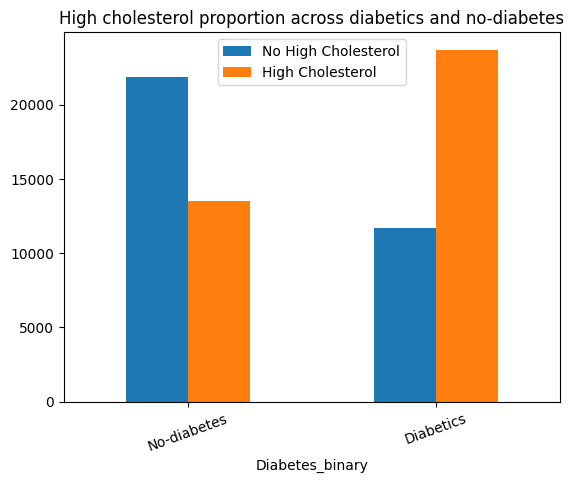

In [51]:
ax=contingency.plot(kind='bar')
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend(['No High Cholesterol', 'High Cholesterol'])
plt.title('High cholesterol proportion across diabetics and no-diabetes')
plt.show()

In [52]:
# Since we have two categorical variables,we will use chi2 test
chi2, p_value_chol, dof, exp_freq = chi2_contingency(contingency)
print('p_value:', p_value_chol)


p_value: 0.0


#### p_value<0.05 we reject the null hypothesis that high cholesterol proportion is not significantly different across diabetics and no-diabetes.

### 4. Is the proportion of high blood pressure significantly different across diabetics and no-diabetes?¶
* H0 - High blood pressure proportion is not significantly different across diabetics and no-diabetes.
* Ha - High blood pressure proportion is different across diabetics and no-diabetes.

In [53]:
# Prepare data
contingency2= pd.crosstab(df.Diabetes_binary, df.HighBP)
contingency2

HighBP,0.0,1.0
Diabetes_binary,,
0.0,22118,13228
1.0,8742,26604


Text(0.5, 1.0, 'High blood pressure proportion across diabetics and no-diabetes')

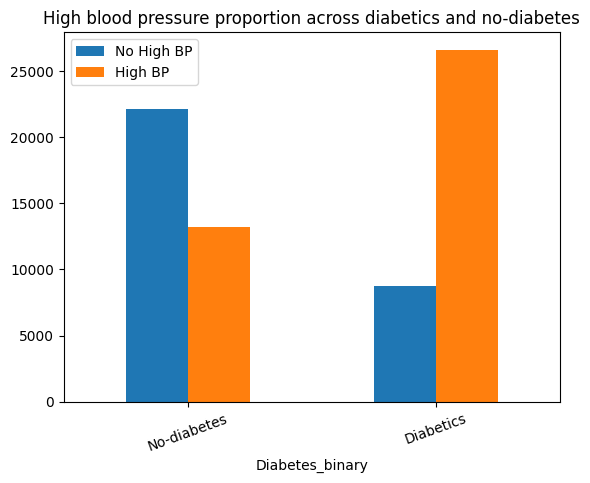

In [54]:
ax = contingency2.plot(kind='bar')
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend( ['No High BP', 'High BP'])
plt.title('High blood pressure proportion across diabetics and no-diabetes')

In [55]:
# Chi2 test for two categorical variables
chi2, p_value_bp, dof, exp_freq = chi2_contingency(contingency)
print('p_value:', p_value_bp)

p_value: 0.0


#### p_value<0.05 We reject the null hypothesis that high blood pressure proportion is not significantly different across diabetics and no-diabetes.

# Predictions
* Now we will build some models to predict diabetes status based on different variables.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [57]:
# Choose columns for model based on correlation matrix 
df_model = df[['Diabetes_binary', 'HighBP','HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Age', 'HeartDiseaseorAttack', 'PhysHlth']]

#Train_test split

X = df_model.drop('Diabetes_binary', axis=1)
y = df_model['Diabetes_binary']
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [58]:
# Decision Tree 
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)

# Calculate model performance
predictions = model_1.predict(X_test)
model_1_score = accuracy_score(y_test, predictions)

print('Accuracy score for Decision Tree is', model_1_score)

Accuracy score for Decision Tree is 0.6807412122498055


In [59]:
# Random Forest
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

# Calculate model performance
predictions = model_2.predict(X_test)
model_2_score = accuracy_score(y_test, predictions)

print('Accuracy score for Random Forest is', model_2_score)

Accuracy score for Random Forest is 0.7110828205672254


In [60]:
# XGB 
model_3 = XGBClassifier()
model_3.fit(X_train, y_train)

# Calculate model performance
predictions = model_3.predict(X_test)
model_3_score = accuracy_score(y_test, predictions)

print('Accuracy score for XGB is', model_3_score)

Accuracy score for XGB is 0.7453851050286442


In [61]:
# KNeighbors 
model_5 = KNeighborsClassifier()
model_5.fit(X_train, y_train)

# Calculate model performance
predictions = model_5.predict(X_test)
model_5_score = accuracy_score(y_test, predictions)

print('Accuracy score for KNeighbors is', model_5_score)

Accuracy score for KNeighbors is 0.7073343235023694


In [64]:
# Compare models performance
Models = ['Decision Tree', 'Random Forest', 'XBG', 'KNeighbors']
Scores = [model_1_score, model_2_score, model_3_score, model_5_score]

performance = pd.DataFrame(list(zip(Models, Scores)), columns = ['Models', 'Accuracy_score']).sort_values('Accuracy_score', ascending=False)
performance

,Models,Accuracy_score
2,XBG,0.745385
1,Random Forest,0.711083
3,KNeighbors,0.707334
0,Decision Tree,0.680741


#### Best performing model is XBG with 74% accuracy

# Thank you